## 1. Dataset Description
Dataset Description
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.


Files
train.csv - the training dataset; NObeyesdad is the categorical target
test.csv - the test dataset; your objective is to predict the class of NObeyesdad for each row
sample_submission.csv - a sample submission file in the correct format

In [1]:
import joblib
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.base import ClassifierMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import  GaussianNB
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score , f1_score
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
import logging
logging.getLogger('lightgbm').setLevel(logging.INFO)
logging.getLogger('lightgbm').setLevel(logging.ERROR)
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

## 1.1 Loading the Dataset

In [2]:
train_df = pd.read_csv('..\\csv\\train.csv')
test_df = pd.read_csv('..\\csv\\test.csv')
original_df = pd.read_csv('..\\csv\\ObesityDataSet.csv')
sample_df = pd.read_csv('..\\csv\\sample_submission.csv')

In [3]:

train_df = pd.concat([train_df, original_df], ignore_index=True)
train_data = train_df.drop_duplicates()

In [4]:
train_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,NaN,Female,20.976842,1.710730,131.408528,yes,yes,3.000000,3.000000,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
22865,NaN,Female,21.982942,1.748584,133.742943,yes,yes,3.000000,3.000000,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
22866,NaN,Female,22.524036,1.752206,133.689352,yes,yes,3.000000,3.000000,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
22867,NaN,Female,24.361936,1.739450,133.346641,yes,yes,3.000000,3.000000,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
train_df.shape

(22869, 18)

In [6]:
columns = train_df.columns
columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22869 entries, 0 to 22868
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  float64
 1   Gender                          22869 non-null  object 
 2   Age                             22869 non-null  float64
 3   Height                          22869 non-null  float64
 4   Weight                          22869 non-null  float64
 5   family_history_with_overweight  22869 non-null  object 
 6   FAVC                            22869 non-null  object 
 7   FCVC                            22869 non-null  float64
 8   NCP                             22869 non-null  float64
 9   CAEC                            22869 non-null  object 
 10  SMOKE                           22869 non-null  object 
 11  CH2O                            22869 non-null  float64
 12  SCC                             

In [8]:
train_df.isna().sum()

id                                2111
Gender                               0
Age                                  0
Height                               0
Weight                               0
family_history_with_overweight       0
FAVC                                 0
FCVC                                 0
NCP                                  0
CAEC                                 0
SMOKE                                0
CH2O                                 0
SCC                                  0
FAF                                  0
TUE                                  0
CALC                                 0
MTRANS                               0
NObeyesdad                           0
dtype: int64

In [9]:
test_df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [10]:
train_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000
mean,10378.50000,23.885263,1.700377,87.767610,2.443428,2.754344,2.027442,0.984382,0.620551
std,5992.46278,5.753419,0.087881,26.364243,0.533329,0.712711,0.608901,0.839466,0.602850
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631662,66.000000,2.000000,3.000000,1.755907,0.015860,0.000000
50%,10378.50000,22.815416,1.700000,84.000000,2.392665,3.000000,2.000000,1.000000,0.579541
75%,15567.75000,26.000000,1.763029,111.531208,3.000000,3.000000,2.535127,1.596576,1.000000
max,20757.00000,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [11]:
test_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [12]:
columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## 2. Data Preprocessing

In [13]:
input_cols = ['Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',]
target_col = 'NObeyesdad'

In [14]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
test_inputs = test_df[input_cols].copy()

In [15]:
train_inputs

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,Female,20.976842,1.710730,131.408528,yes,yes,3.000000,3.000000,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
22865,Female,21.982942,1.748584,133.742943,yes,yes,3.000000,3.000000,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
22866,Female,22.524036,1.752206,133.689352,yes,yes,3.000000,3.000000,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
22867,Female,24.361936,1.739450,133.346641,yes,yes,3.000000,3.000000,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [16]:
test_inputs

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [17]:
train_targets

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
22864       Obesity_Type_III
22865       Obesity_Type_III
22866       Obesity_Type_III
22867       Obesity_Type_III
22868       Obesity_Type_III
Name: NObeyesdad, Length: 22869, dtype: object

In [18]:
train_inputs

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,Female,20.976842,1.710730,131.408528,yes,yes,3.000000,3.000000,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
22865,Female,21.982942,1.748584,133.742943,yes,yes,3.000000,3.000000,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
22866,Female,22.524036,1.752206,133.689352,yes,yes,3.000000,3.000000,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
22867,Female,24.361936,1.739450,133.346641,yes,yes,3.000000,3.000000,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [19]:
numeric_cols = ['Age','Height', 'Weight', 
                'FCVC', 'NCP', 'CH2O',
        'FAF', 'TUE',]

cat_cols = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']

## 2.1 Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [21]:
train_inputs

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,0.096944,-0.004315,-0.231290,yes,yes,-0.831454,0.321249,Sometimes,no,1.208977,no,-1.172655,0.590412,Sometimes,Public_Transportation
1,Female,-1.022938,-1.597389,-1.167046,yes,yes,-0.831454,0.344685,Frequently,no,-0.045069,no,0.018605,0.629439,no,Automobile
2,Female,-1.022938,0.126115,-1.426276,yes,yes,-1.055460,-1.883916,Sometimes,no,-0.192259,no,-0.140970,1.746797,no,Public_Transportation
3,Female,-0.509713,0.117808,1.650273,yes,yes,1.043604,0.344685,Sometimes,no,-0.580372,no,0.575951,0.264828,Sometimes,Public_Transportation
4,Male,1.348066,2.432987,0.228741,yes,yes,0.442955,-1.098466,Sometimes,no,-0.078166,no,1.171712,0.516176,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,Female,-0.505523,0.117808,1.655343,yes,yes,1.043604,0.344685,Sometimes,no,-0.491558,no,0.824217,0.473920,Sometimes,Public_Transportation
22865,Female,-0.330649,0.548558,1.743890,yes,yes,1.043604,0.344685,Sometimes,no,-0.036644,no,0.425289,-0.035301,Sometimes,Public_Transportation
22866,Female,-0.236600,0.589774,1.741857,yes,yes,1.043604,0.344685,Sometimes,no,0.043934,no,0.512035,0.042693,Sometimes,Public_Transportation
22867,Female,0.082852,0.444620,1.728858,yes,yes,1.043604,0.344685,Sometimes,no,1.354761,no,0.184318,-0.057256,Sometimes,Public_Transportation


In [22]:
test_inputs

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,0.523982,1.683185,1.247041,yes,yes,0.928505,0.344685,Sometimes,no,1.310894,no,-0.153651,-1.029385,Sometimes,Public_Transportation
1,Female,-0.501498,-1.142218,-0.825667,yes,yes,-0.831454,-2.461561,Sometimes,no,1.597271,no,0.018605,-1.029385,Sometimes,Public_Transportation
2,Female,0.367570,-0.648870,0.904007,yes,yes,1.043604,0.344685,Sometimes,no,0.976264,no,-1.172655,-0.613846,Sometimes,Public_Transportation
3,Male,-0.505104,-1.675599,0.603160,yes,yes,-0.831454,0.313689,Sometimes,no,1.246495,no,-1.059662,-1.029385,Sometimes,Public_Transportation
4,Female,0.367570,-0.830472,0.647396,yes,yes,1.043604,0.344685,Sometimes,no,1.028251,no,-1.172655,0.199918,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,Male,-0.096888,0.239042,-0.369343,yes,no,0.693407,0.344685,Sometimes,no,-1.687410,no,-0.211218,0.262229,Sometimes,Public_Transportation
13836,Female,0.889010,-1.256011,-0.977391,no,yes,1.043604,0.344685,Sometimes,no,-0.045069,no,-1.172655,-1.029385,Sometimes,Public_Transportation
13837,Female,-0.165062,-1.306683,-1.645863,no,yes,1.043604,-0.674347,Frequently,no,-0.045069,no,1.150111,0.629439,Sometimes,Public_Transportation
13838,Male,-0.501498,-0.914633,-1.318770,yes,yes,-0.831454,0.344685,Sometimes,no,-0.045069,no,2.401124,2.288264,no,Public_Transportation


## 2.2 Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [23]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoder.fit(train_inputs[cat_cols])
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

train_inputs[encoded_cols] = encoder.transform(train_inputs[cat_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[cat_cols])

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_targets = train_df['NObeyesdad']
train_targets= labelencoder.fit_transform(train_targets)

train_targets

array([6, 1, 0, ..., 4, 4, 4])

In [25]:
label_text = labelencoder.classes_
label_text

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [26]:
train_inputs

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Male,0.096944,-0.004315,-0.231290,yes,yes,-0.831454,0.321249,Sometimes,no,1.208977,no,-1.172655,0.590412,Sometimes,Public_Transportation,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Female,-1.022938,-1.597389,-1.167046,yes,yes,-0.831454,0.344685,Frequently,no,-0.045069,no,0.018605,0.629439,no,Automobile,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,Female,-1.022938,0.126115,-1.426276,yes,yes,-1.055460,-1.883916,Sometimes,no,-0.192259,no,-0.140970,1.746797,no,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Female,-0.509713,0.117808,1.650273,yes,yes,1.043604,0.344685,Sometimes,no,-0.580372,no,0.575951,0.264828,Sometimes,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Male,1.348066,2.432987,0.228741,yes,yes,0.442955,-1.098466,Sometimes,no,-0.078166,no,1.171712,0.516176,Sometimes,Public_Transportation,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,Female,-0.505523,0.117808,1.655343,yes,yes,1.043604,0.344685,Sometimes,no,-0.491558,no,0.824217,0.473920,Sometimes,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22865,Female,-0.330649,0.548558,1.743890,yes,yes,1.043604,0.344685,Sometimes,no,-0.036644,no,0.425289,-0.035301,Sometimes,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22866,Female,-0.236600,0.589774,1.741857,yes,yes,1.043604,0.344685,Sometimes,no,0.043934,no,0.512035,0.042693,Sometimes,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22867,Female,0.082852,0.444620,1.728858,yes,yes,1.043604,0.344685,Sometimes,no,1.354761,no,0.184318,-0.057256,Sometimes,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
test_inputs

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Male,0.523982,1.683185,1.247041,yes,yes,0.928505,0.344685,Sometimes,no,1.310894,no,-0.153651,-1.029385,Sometimes,Public_Transportation,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Female,-0.501498,-1.142218,-0.825667,yes,yes,-0.831454,-2.461561,Sometimes,no,1.597271,no,0.018605,-1.029385,Sometimes,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Female,0.367570,-0.648870,0.904007,yes,yes,1.043604,0.344685,Sometimes,no,0.976264,no,-1.172655,-0.613846,Sometimes,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Male,-0.505104,-1.675599,0.603160,yes,yes,-0.831454,0.313689,Sometimes,no,1.246495,no,-1.059662,-1.029385,Sometimes,Public_Transportation,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Female,0.367570,-0.830472,0.647396,yes,yes,1.043604,0.344685,Sometimes,no,1.028251,no,-1.172655,0.199918,Sometimes,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,Male,-0.096888,0.239042,-0.369343,yes,no,0.693407,0.344685,Sometimes,no,-1.687410,no,-0.211218,0.262229,Sometimes,Public_Transportation,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13836,Female,0.889010,-1.256011,-0.977391,no,yes,1.043604,0.344685,Sometimes,no,-0.045069,no,-1.172655,-1.029385,Sometimes,Public_Transportation,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13837,Female,-0.165062,-1.306683,-1.645863,no,yes,1.043604,-0.674347,Frequently,no,-0.045069,no,1.150111,0.629439,Sometimes,Public_Transportation,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13838,Male,-0.501498,-0.914633,-1.318770,yes,yes,-0.831454,0.344685,Sometimes,no,-0.045069,no,2.401124,2.288264,no,Public_Transportation,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
X_train = train_inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

In [29]:
X_train

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.096944,-0.004315,-0.231290,-0.831454,0.321249,1.208977,-1.172655,0.590412,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.022938,-1.597389,-1.167046,-0.831454,0.344685,-0.045069,0.018605,0.629439,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-1.022938,0.126115,-1.426276,-1.055460,-1.883916,-0.192259,-0.140970,1.746797,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.509713,0.117808,1.650273,1.043604,0.344685,-0.580372,0.575951,0.264828,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.348066,2.432987,0.228741,0.442955,-1.098466,-0.078166,1.171712,0.516176,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,-0.505523,0.117808,1.655343,1.043604,0.344685,-0.491558,0.824217,0.473920,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22865,-0.330649,0.548558,1.743890,1.043604,0.344685,-0.036644,0.425289,-0.035301,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22866,-0.236600,0.589774,1.741857,1.043604,0.344685,0.043934,0.512035,0.042693,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22867,0.082852,0.444620,1.728858,1.043604,0.344685,1.354761,0.184318,-0.057256,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
X_test

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.523982,1.683185,1.247041,0.928505,0.344685,1.310894,-0.153651,-1.029385,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.501498,-1.142218,-0.825667,-0.831454,-2.461561,1.597271,0.018605,-1.029385,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.367570,-0.648870,0.904007,1.043604,0.344685,0.976264,-1.172655,-0.613846,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.505104,-1.675599,0.603160,-0.831454,0.313689,1.246495,-1.059662,-1.029385,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.367570,-0.830472,0.647396,1.043604,0.344685,1.028251,-1.172655,0.199918,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,-0.096888,0.239042,-0.369343,0.693407,0.344685,-1.687410,-0.211218,0.262229,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13836,0.889010,-1.256011,-0.977391,1.043604,0.344685,-0.045069,-1.172655,-1.029385,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13837,-0.165062,-1.306683,-1.645863,1.043604,-0.674347,-0.045069,1.150111,0.629439,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13838,-0.501498,-0.914633,-1.318770,-0.831454,0.344685,-0.045069,2.401124,2.288264,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## 2.3 Spliting the Dataset into Training and Validation Sets

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_val, train_targets, val_targets = train_test_split(X_train, train_targets, test_size=0.2  ,random_state=42)

In [32]:
X_train

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
15273,-0.773566,-2.014211,-1.736011,1.043604,-2.461561,-0.708227,-1.172655,-0.098972,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4641,-0.501498,-0.573255,-0.673943,-0.831454,-2.461561,1.597271,0.018605,-1.029385,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8732,-0.246105,-0.222114,-0.218771,-2.293954,-2.461561,-0.045069,-1.172655,0.994429,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7488,-0.041251,-0.425575,1.013207,1.043604,0.344685,0.478403,-0.757097,-0.344612,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8542,-0.465445,-0.004292,-0.206290,-0.837758,0.344685,1.064441,-1.172655,1.774197,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.327684,0.564671,0.274332,1.043604,0.344685,-0.045069,2.401124,-1.029385,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
21575,-0.199014,0.192433,-0.448323,-0.831454,0.344685,-0.045069,-1.172655,2.288264,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5390,-0.501498,-0.914633,-0.749805,-0.831454,0.344685,1.597271,1.209865,-1.029385,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
860,0.367570,-0.571833,0.916870,1.043604,0.344685,1.220735,-1.172655,-0.635735,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
X_val

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
9123,-0.452441,0.222304,1.655343,1.043604,0.344685,-0.491558,0.575900,0.506426,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18200,-0.501498,-0.004292,-0.484288,-0.831454,0.344685,1.597271,1.209865,0.629439,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11206,3.425297,-1.197237,-0.394970,-0.831454,0.344685,0.238479,1.209865,-1.029385,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
16463,1.271272,2.432987,1.415215,0.098931,0.344685,-0.684321,0.009517,-0.668372,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9303,0.889010,-0.573255,0.084677,-0.831454,0.344685,1.597271,-1.172655,2.288264,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16794,0.366999,-0.511659,0.651228,1.043604,0.344685,-0.614881,-1.064349,-0.023700,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20249,2.548454,0.565639,1.151076,0.907075,0.335738,-0.045069,-0.058568,-1.029385,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8777,-0.774096,-0.247694,-0.354014,1.043604,-0.988411,0.698564,0.222501,0.625458,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19551,0.972972,2.375169,1.564485,-0.715259,0.344685,-1.419275,-0.997636,1.364650,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
train_targets

array([0, 5, 2, ..., 5, 4, 2])

In [35]:
val_targets

array([4, 5, 2, ..., 6, 3, 4])

## 3. Training and testing a baseline model

In [36]:
models:dict[str, dict[str,float]] = {
    
    GaussianNB : {

    },

    LogisticRegression : {
        'n_jobs' : -1
    },

    SVC: {
        'C' : 10,
        'kernel': 'rbf',
        
    },
    
    SGDClassifier : {
        'eta0' : 0.001 ,
        'max_iter': 2000 ,
        'penalty': 'l1' ,
        'learning_rate': 'adaptive'
    },

    RandomForestClassifier : {
        'max_depth': 32 , 
        'max_features': 'sqrt' , 
        'max_leaf_nodes': 100 , 
        'min_samples_leaf': 4
    },

    GradientBoostingClassifier : {
        'learning_rate': 0.001,
        'n_estimators' : 400,

    },

    XGBClassifier : {
                'n_estimators': 400 ,
                'max_depth': 32 , 
                'min_samples_split': 10 ,
                'min_samples_leaf':4 , 
                'n_jobs':-1
    },

    LGBMClassifier : {
        'n_estimators': 400,
        'max_depth': 10,
        'learning_rate': 0.01,
        'subsample': 0.5,

    },

    MLPClassifier : {
        'activation': 'identity',
        'solver': 'adam',
        'batch_size': 32,
        'max_iter': 400,
        'random_state': 42,
        'beta_1': 0.5,

    },
    CatBoostClassifier :{
    'n_estimators': 900,
    'verbose': 0 ,
    'learning_rate': 0.005,
    'l2_leaf_reg':1e-3,
    }
}

In [37]:
def evaluate_model(model,
                   params: dict,
                   X_train: np.ndarray,
                   train_targets: np.ndarray,
                   X_val: np.ndarray, 
                   val_targets: np.ndarray) -> tuple[float, float, float, float]:
    """
    Trains a model and evaluates it on training and validation datasets.

    Parameters:
    - model: The regressor class to be used for training.
    - params (Dict): Dictionary of parameters to initialize the model.
    - X_train (np.ndarray): The training data features.
    - train_targets (np.ndarray): The training data targets.
    - X_val (np.ndarray): The validation data features.
    - val_targets (np.ndarray): The validation data targets.

    Returns:
    - Tuple[float, float, float, float]: A tuple containing training accuracy,
      validation accuracy, training F1 score, and validation F1 score.
    """
    regressor = model(**params).fit(X_train, train_targets)
    train_preds = regressor.predict(X_train)
    val_preds = regressor.predict(X_val)

    train_acc = accuracy_score(train_targets, train_preds)
    val_acc = accuracy_score(val_targets, val_preds)

    train_f1 = f1_score(train_targets, train_preds , average='macro')
    val_f1 = f1_score(val_targets, val_preds , average='macro')

    return (train_acc, val_acc, train_f1, val_f1)


def try_models(model_dict: dict[str, dict[str,float]], 
               X_train: np.ndarray, 
               train_targets: np.ndarray, 
               X_val: np.ndarray, 
               val_targets: np.ndarray) -> pd.DataFrame:
    """
    Evaluates multiple models on training and validation datasets.

    Parameters:
    - model_dict (Dict): A dictionary where keys are model classes and values are dictionaries of parameters.
    - X_train (np.ndarray): The training data features.
    - train_targets (np.ndarray): The training data targets.
    - X_val (np.ndarray): The validation data features.
    - val_targets (np.ndarray): The validation data targets.

    Returns:
    - pd.DataFrame: A dataframe containing model names, parameters, and evaluation metrics.
    """
    results = Parallel(n_jobs=-1)(delayed(evaluate_model)(model, params, X_train, train_targets, X_val, val_targets) for model, params in model_dict.items())

    metrics = ['train_acc', 'val_acc', 'train_f1', 'val_f1']
    results_dict = {metric: [result[i] for result in results] for i, metric in enumerate(metrics)}

    df = pd.DataFrame({
        'models': list(model_dict.keys()),
        'params': list(model_dict.values()),
        **results_dict
    })

    return df

In [38]:
models_df = try_models(model_dict=models, 
                       X_train=X_train,
                       train_targets=train_targets,
                       X_val=X_val,
                       val_targets=val_targets)
models_df

,models,params,train_acc,val_acc,train_f1,val_f1
0,<class 'sklearn.naive_bayes.GaussianNB'>,{},0.579831,0.588107,0.498159,0.507264
1,<class 'sklearn.linear_model._logistic.Logisti...,{'n_jobs': -1},0.871604,0.866419,0.858693,0.852966
2,<class 'sklearn.svm._classes.SVC'>,"{'C': 10, 'kernel': 'rbf'}",0.938726,0.879318,0.932776,0.867165
3,<class 'sklearn.linear_model._stochastic_gradi...,"{'eta0': 0.001, 'max_iter': 2000, 'penalty': '...",0.695873,0.701574,0.649888,0.657323
4,<class 'sklearn.ensemble._forest.RandomForestC...,"{'max_depth': 32, 'max_features': 'sqrt', 'max...",0.887128,0.864233,0.875364,0.849599
5,<class 'sklearn.ensemble._gb.GradientBoostingC...,"{'learning_rate': 0.001, 'n_estimators': 400}",0.815633,0.806296,0.791689,0.782996
6,<class 'xgboost.sklearn.XGBClassifier'>,"{'n_estimators': 400, 'max_depth': 32, 'min_sa...",1.000000,0.895059,1.000000,0.884502
7,<class 'lightgbm.sklearn.LGBMClassifier'>,"{'n_estimators': 400, 'max_depth': 10, 'learni...",0.945668,0.903148,0.939922,0.893268
8,<class 'sklearn.neural_network._multilayer_per...,"{'activation': 'identity', 'solver': 'adam', '...",0.875048,0.860079,0.863593,0.847564
9,<class 'catboost.core.CatBoostClassifier'>,"{'n_estimators': 900, 'verbose': 0, 'learning_...",0.896365,0.876476,0.886393,0.864502


In [39]:
best_obtained_params = models_df[models_df['val_acc'] == models_df['val_acc'].max()]['params'].to_dict()[7]

In [40]:
best_obtained_params['verbosity'] = -1

In [41]:
def evalmodel(model,
              X_train:np.array = X_train, 
              train_targets:np.array = train_targets,
              X_val:np.array = X_val,
              val_targets:np.array= val_targets,
              **params) -> dict[str , float]:
    """
    Trains a given model with training data and evaluates its performance on both training and validation data.

    Parameters:
    model (class): A machine learning model class (e.g., sklearn.ensemble.RandomForestClassifier).
    X_train (np.array): Feature matrix for training data.
    train_targets (np.array): Target values for training data.
    X_val (np.array): Feature matrix for validation data.
    val_targets (np.array): Target values for validation data.
    **params: Additional parameters to initialize the model.

    Returns:
    dict[str, float]: A dictionary containing the accuracy and F1 score for both training and validation data.
    """
    model = model(**params).fit(X_train,train_targets)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    return {
        'Train Accuracy:': accuracy_score(train_preds,train_targets ),
        'Val Accuracy:' :  accuracy_score(val_preds,val_targets ),
        'Train F1 Score:' :  f1_score(val_preds,val_targets, average='macro'),
        'Val F1 Score:' :  f1_score(val_preds,val_targets , average='macro'),
    }

In [42]:
evalmodel(LGBMClassifier , **best_obtained_params)

{'Train Accuracy:': 0.9456682153593878,
 'Val Accuracy:': 0.9031482291211194,
 'Train F1 Score:': 0.8932676990262952,
 'Val F1 Score:': 0.8932676990262952}

In [43]:
def plot_model_importance(model: type[ClassifierMixin], 
                          X_train: pd.DataFrame = X_train, 
                          train_targets: pd.Series = train_targets,
                          get_importance_df : bool = False,
                          **params) -> pd.DataFrame:
    """
    Trains a model and plots the feature importances.

    Parameters:
    - model (Type[ClassifierMixin]): The classifier to be used for training.
    - X_train (pd.DataFrame): The training data features.
    - train_targets (pd.Series): The training data targets.
    - **params: Additional parameters to be passed to the model.

    Returns:
    - pd.DataFrame: A dataframe containing feature names and their importance scores.
    """
    # Train the model
    classifier = model(**params)
    classifier.fit(X_train, train_targets)
    
    # Create a DataFrame with feature importances
    importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': classifier.feature_importances_
    }).sort_values('importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(12, 10))
    sns.set(style="whitegrid")
    barplot = sns.barplot(data=importance_df, x='importance', y='feature', palette='viridis')
    
    # Customize the plot appearance
    barplot.set_title('Feature Importance of Model', fontsize=16, weight='bold')
    barplot.set_xlabel('Importance', fontsize=14)
    barplot.set_ylabel('Feature', fontsize=14)
    barplot.tick_params(axis='x', rotation=90, labelsize=12)
    barplot.tick_params(axis='y', labelsize=12)
    
    # Add value labels on the bars
    for index, value in enumerate(importance_df['importance']):
        barplot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=12)
    
    plt.tight_layout()
    plt.show()
    if get_importance_df == True:
        return importance_df

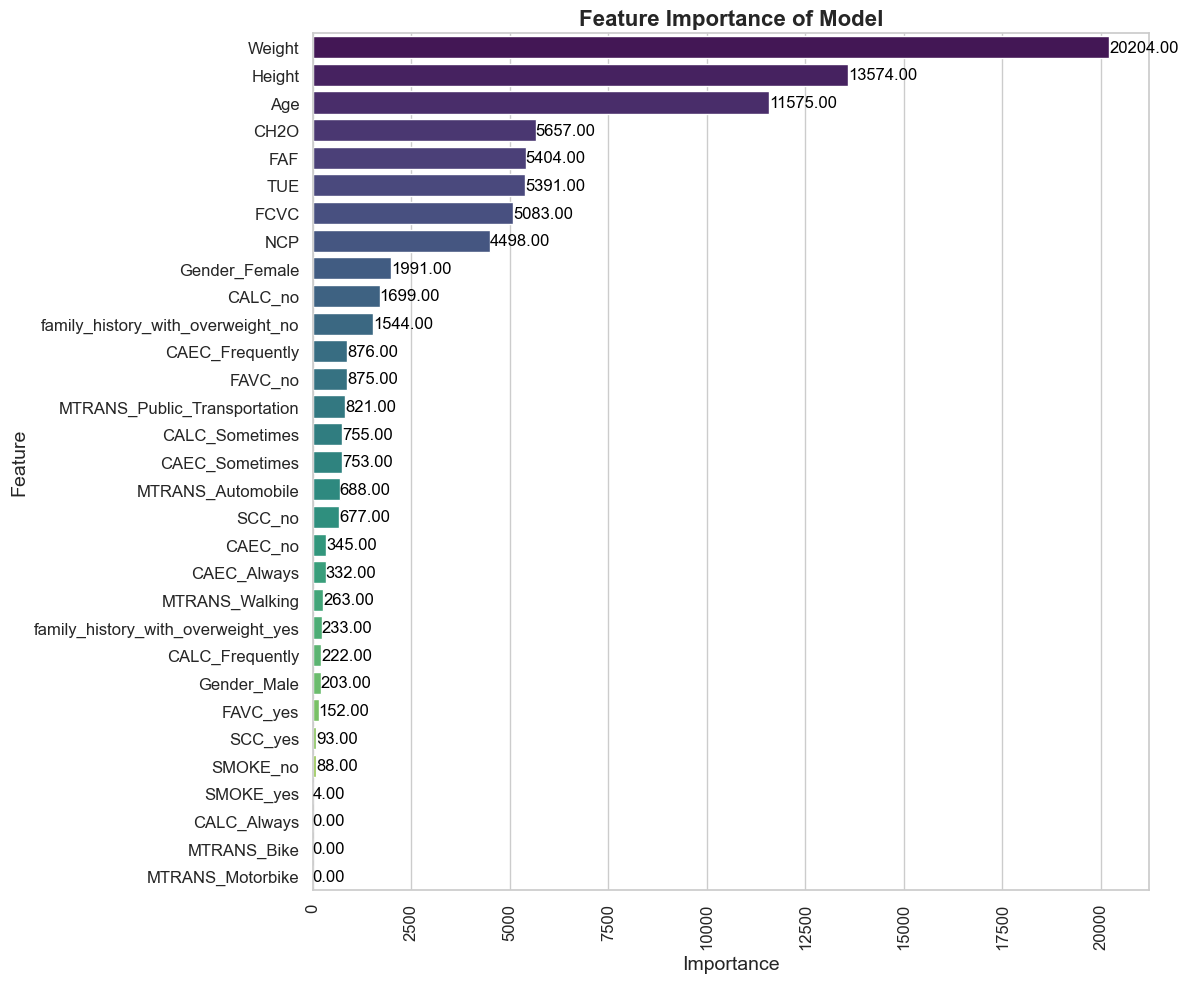

In [44]:
plot_model_importance(LGBMClassifier,**best_obtained_params)

In [45]:
class_names = label_text

In [46]:
class_names

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [47]:
def plot_confusion_matrix(model: type[ClassifierMixin], 
                          X_train: np.array, 
                          train_targets: np.array,
                          X_val: np.array = None, 
                          val_targets: np.array = None, 
                          labels: list = None,
                          **params) :
    """
    Trains a model and plots the confusion matrices for both training and validation datasets.

    Parameters:
    - model (Type[ClassifierMixin]): The classifier to be used for training.
    - X_train (np.array): The training data features.
    - train_targets (np.array): The training data targets.
    - X_val (np.array, optional): The validation data features.
    - val_targets (np.array, optional): The validation data targets.
    - labels (list, optional): The list of labels to be used in the confusion matrix heatmap.
    - **params: Additional parameters to be passed to the model.
    """
    classifier = model(**params).fit(X_train, train_targets)
    train_preds = classifier.predict(X_train)
    train_cm = confusion_matrix(train_targets, train_preds)
    
    if X_val is not None and val_targets is not None:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    else:
        fig, axes = plt.subplots(1, 1, figsize=(8, 6))
        axes = [axes]
    
    sns.heatmap(train_cm, annot=True, fmt='d', ax=axes[0], cmap='Blues',
                xticklabels=labels if labels is not None else 'auto', 
                yticklabels=labels if labels is not None else 'auto')
    axes[0].set_title('Confusion Matrix: Training Dataset')
    axes[0].set_xlabel('Predicted Labels')
    axes[0].set_ylabel('True Labels')

    if X_val is not None and val_targets is not None:
        val_preds = classifier.predict(X_val)
        val_cm = confusion_matrix(val_targets, val_preds)
        
        sns.heatmap(val_cm, annot=True, fmt='d', ax=axes[1], cmap='rocket',
                    xticklabels=labels if labels is not None else 'auto', 
                    yticklabels=labels if labels is not None else 'auto')
        axes[1].set_title('Confusion Matrix: Validation Dataset')
        axes[1].set_xlabel('Predicted Labels')
        axes[1].set_ylabel('True Labels')
    
    plt.tight_layout()
    plt.show()

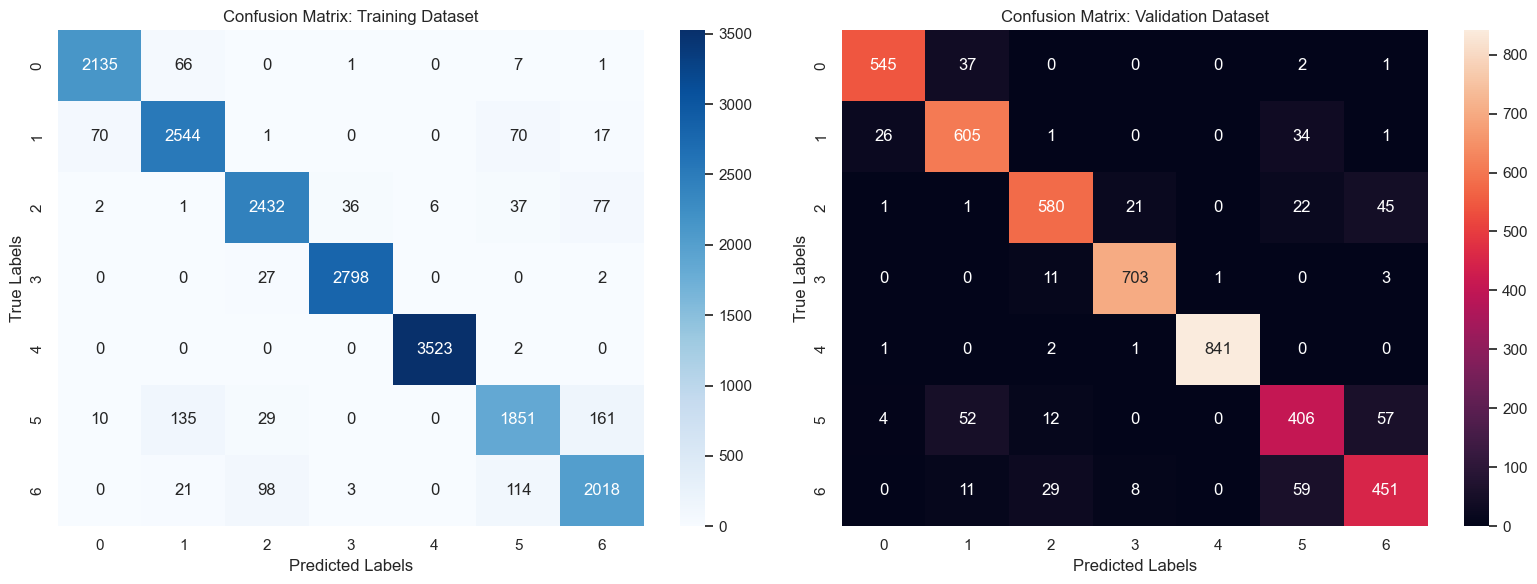

In [48]:
plot_confusion_matrix(LGBMClassifier, X_train, train_targets, X_val=X_val , val_targets=val_targets, **best_obtained_params)

In [49]:
list(class_names)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [50]:
def plot_classification_report(model: type[ClassifierMixin], 
                               X_train: np.array, 
                               train_targets: np.array, 
                               X_val: np.array = None, 
                               val_targets: np.array = None, 
                               labels: list = None, 
                               **params):
    """
    Trains a model and prints the classification reports for both training and validation datasets.

    Parameters:
    - model (Type[ClassifierMixin]): The classifier to be used for training.
    - X_train (np.array): The training data features.
    - train_targets (np.array): The training data targets.
    - X_val (np.array, optional): The validation data features.
    - val_targets (np.array, optional): The validation data targets.
    - labels (list, optional): The list of labels to be used in the classification report.
    - **params: Additional parameters to be passed to the model.
    """
    classifier = model(**params).fit(X_train, train_targets)
    train_preds = classifier.predict(X_train)
    train_report = classification_report(train_targets, train_preds, target_names=labels)
    
    print('-----------------------------------------------------------')
    print('------------------Training Dataset Report------------------')
    print(train_report)
    
    if X_val is not None and val_targets is not None:
        val_preds = classifier.predict(X_val)
        val_report = classification_report(val_targets, val_preds, target_names=labels)
        
        print('-----------------------------------------------------------')
        print('----------------Validation Dataset Report------------------')
        print(val_report)

In [51]:
plot_classification_report(LGBMClassifier , X_train ,train_targets , X_val , val_targets ,labels=class_names,**best_obtained_params)

-----------------------------------------------------------
------------------Training Dataset Report------------------
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.97      0.96      2210
      Normal_Weight       0.92      0.94      0.93      2702
     Obesity_Type_I       0.94      0.94      0.94      2591
    Obesity_Type_II       0.99      0.99      0.99      2827
   Obesity_Type_III       1.00      1.00      1.00      3525
 Overweight_Level_I       0.89      0.85      0.87      2186
Overweight_Level_II       0.89      0.90      0.89      2254

           accuracy                           0.95     18295
          macro avg       0.94      0.94      0.94     18295
       weighted avg       0.95      0.95      0.95     18295

-----------------------------------------------------------
----------------Validation Dataset Report------------------
                     precision    recall  f1-score   support

Insufficient_Weight     

## HyperParameter Optimization


In [52]:
import optuna
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
def objective(trial):

    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_leaves": trial.suggest_int("num_leaves", 20,60, log=True),
        "bagging_freq": trial.suggest_int("bagging_freq", 1,10, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 300,800, log=True),
        'max_depth': trial.suggest_int("max_depth", 10,40, log=True),
        'learning_rate':trial.suggest_float("learning_rate", 1e-3, 1e-2, log=True),
        "min_child_samples": trial.suggest_int("min_child_samples", 5,20, log=True),
        'min_child_weight':trial.suggest_float("min_child_weight", 1e-5,1e-2, log=True),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-1,0.8, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-1, 0.8, log=True),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 0.9),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 0.8),
        'min_split_gain': trial.suggest_float("min_split_gain", 0.4, 0.9, log=True),
        'colsample_bytree ': trial.suggest_float("colsample_bytree ", 0.3, 0.9, log=True),
    }

    model = LGBMClassifier(n_jobs=-1,**param).fit(X_train,train_targets)
    val_preds = model.predict(X_val)
    accuracy = accuracy_score(val_preds,val_targets)
    return accuracy

In [53]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
trial.params

[I 2024-06-11 10:35:33,499] A new study created in memory with name: no-name-0c06c453-d5c2-4ab4-a4f1-aec605f6669e
[I 2024-06-11 10:35:37,571] Trial 0 finished with value: 0.90030607783122 and parameters: {'num_leaves': 25, 'bagging_freq': 3, 'n_estimators': 538, 'max_depth': 29, 'learning_rate': 0.004530962885174407, 'min_child_samples': 10, 'min_child_weight': 0.000552074552365024, 'lambda_l1': 0.5867715842338093, 'lambda_l2': 0.6189181801724625, 'feature_fraction': 0.5644108780795194, 'bagging_fraction': 0.42917879744414633, 'min_split_gain': 0.4592347974859967, 'colsample_bytree ': 0.7368585111746538}. Best is trial 0 with value: 0.90030607783122.
[I 2024-06-11 10:35:41,410] Trial 1 finished with value: 0.9009619588981198 and parameters: {'num_leaves': 22, 'bagging_freq': 1, 'n_estimators': 470, 'max_depth': 18, 'learning_rate': 0.005272605022434072, 'min_child_samples': 7, 'min_child_weight': 0.0003530068714475139, 'lambda_l1': 0.2864226111878043, 'lambda_l2': 0.16924071448233075, 

Number of finished trials: 150
Best trial:
  Value: 0.909925666812418


{'num_leaves': 20,
 'bagging_freq': 3,
 'n_estimators': 779,
 'max_depth': 14,
 'learning_rate': 0.008877276530441219,
 'min_child_samples': 11,
 'min_child_weight': 0.002806728180064354,
 'lambda_l1': 0.6935909875197649,
 'lambda_l2': 0.3671284136681936,
 'feature_fraction': 0.8908285356319183,
 'bagging_fraction': 0.6439256668940377,
 'min_split_gain': 0.4885181576912925,
 'colsample_bytree ': 0.33181936159654335}

In [54]:
lgbm_param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        'num_leaves': 20,
        'bagging_freq': 3,
        'n_estimators': 779,
        'max_depth': 14,
        'learning_rate': 0.008877276530441219,
        'min_child_samples': 11,
        'min_child_weight': 0.002806728180064354,
        'lambda_l1': 0.6935909875197649,
        'lambda_l2': 0.3671284136681936,
        'feature_fraction': 0.8908285356319183,
        'bagging_fraction': 0.6439256668940377,
        'min_split_gain': 0.4885181576912925,
        'colsample_bytree ': 0.33181936159654335   ,
}
evalmodel(LGBMClassifier,**lgbm_param)

{'Train Accuracy:': 0.942825908718229,
 'Val Accuracy:': 0.909925666812418,
 'Train F1 Score:': 0.9009165664635691,
 'Val F1 Score:': 0.9009165664635691}

In [55]:
fig = optuna.visualization.plot_optimization_history(study)
fig.update_layout(width=1000,height=700)
fig.show()

In [56]:
fig = optuna.visualization.plot_param_importances(study)
fig.update_layout(width=900,height=600)
fig.show()

In [60]:
fig = optuna.visualization.plot_slice(study, params= trial.params.keys())
fig.show()

## Final Model Training and Evaluation

In [63]:
model = LGBMClassifier(**lgbm_param)
model.fit(X_train,train_targets)
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

In [64]:
print(f'Training Accuracy : {round(accuracy_score(train_preds,train_targets)*100,2)}%')
print(f'Validation Accuracy: {round(accuracy_score(val_preds,val_targets)*100,2)}%')

Training Accuracy : 94.28%
Validation Accuracy: 90.99%


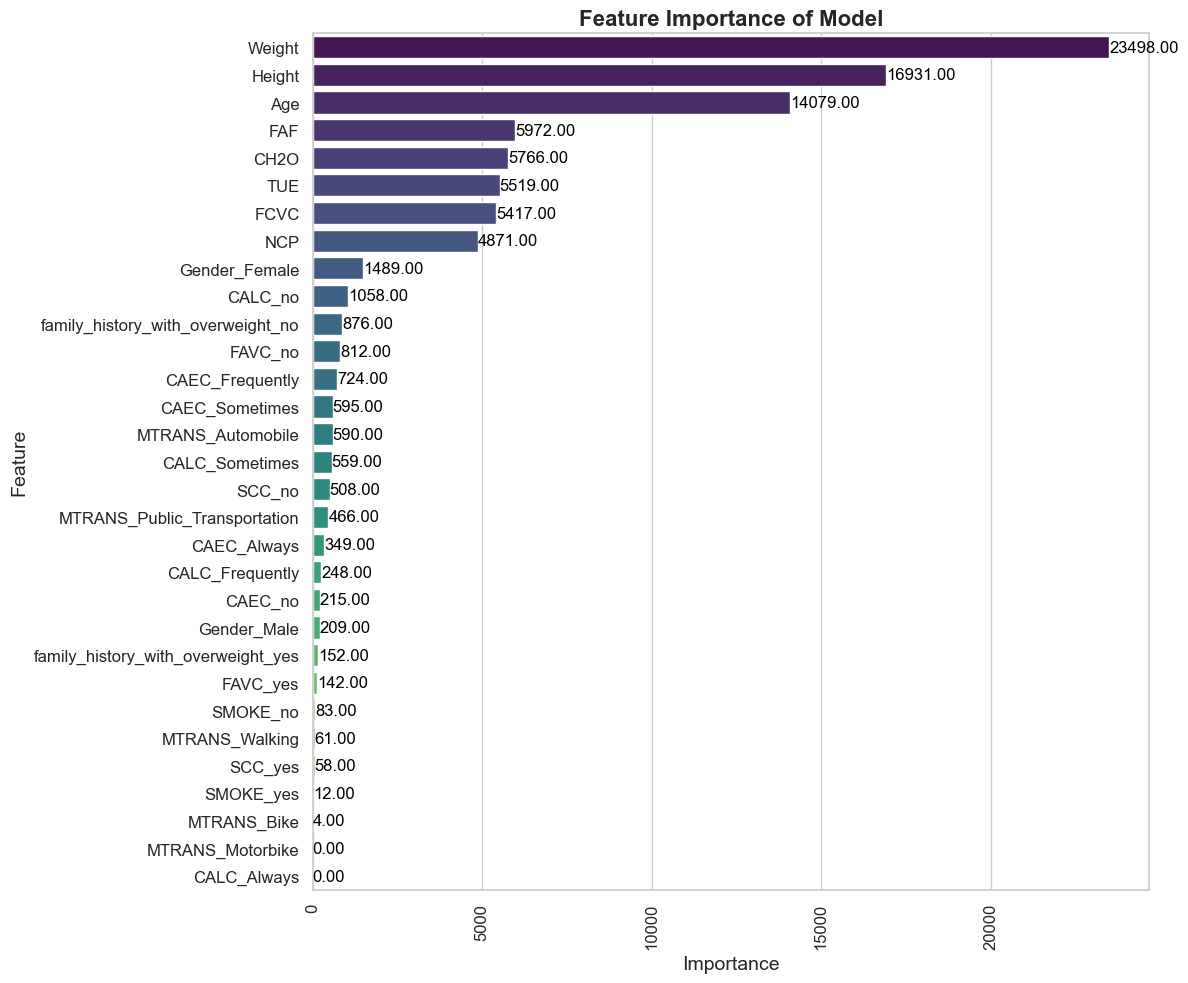

In [65]:
plot_model_importance(LGBMClassifier , **lgbm_param)

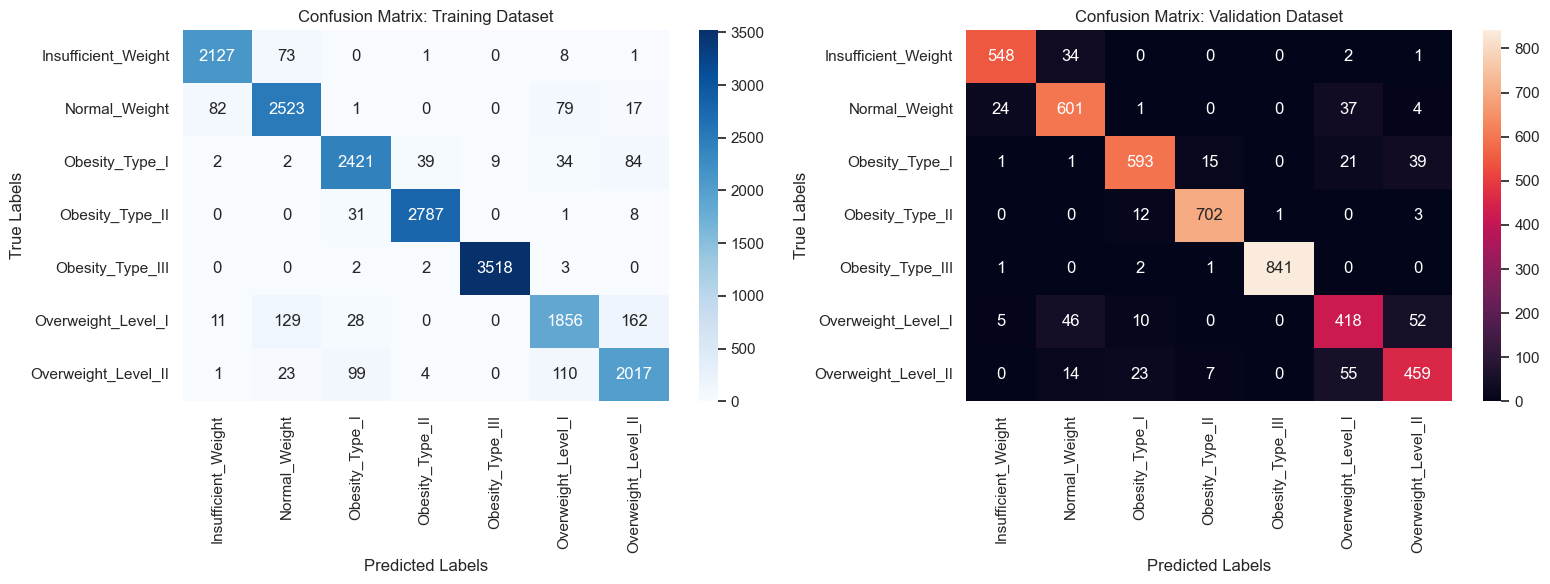

In [68]:
plot_confusion_matrix(LGBMClassifier , X_train,train_targets, X_val , val_targets, labels=class_names,**lgbm_param)

In [69]:
plot_classification_report(LGBMClassifier , X_train,train_targets, X_val , val_targets, labels=class_names,**lgbm_param)

-----------------------------------------------------------
------------------Training Dataset Report------------------
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96      2210
      Normal_Weight       0.92      0.93      0.93      2702
     Obesity_Type_I       0.94      0.93      0.94      2591
    Obesity_Type_II       0.98      0.99      0.98      2827
   Obesity_Type_III       1.00      1.00      1.00      3525
 Overweight_Level_I       0.89      0.85      0.87      2186
Overweight_Level_II       0.88      0.89      0.89      2254

           accuracy                           0.94     18295
          macro avg       0.94      0.94      0.94     18295
       weighted avg       0.94      0.94      0.94     18295

-----------------------------------------------------------
----------------Validation Dataset Report------------------
                     precision    recall  f1-score   support

Insufficient_Weight     

## Saving the best Model

In [71]:
import joblib
import os
filepath = '../saved models/LGBModel.joblib'
def save_model(model : type[ClassifierMixin], 
               model_params : dict[str,float], 
               filepath:str) -> None:
    """
    Save a model and its parameters to a specified file path using joblib.

    Parameters:
    model (type[ClassifierMixin]) : The model to be saved.
    model_params (dict[str,float]) : The parameters used to create the model.
    filepath (str): The file path where the model and its parameters will be saved.
    
    Returns:
    None
    """
    # Create the directory if it doesn't exist
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    
    # Save the model and parameters to a dictionary
    model_data = {
        'model': model,
        'params': model_params
    }
    
    # Save the dictionary to the specified file path
    joblib.dump(model_data, filepath)
    print(f"Model and parameters saved to {filepath}")

save_model(model, lgbm_param, filepath)

Model and parameters saved to ../saved models/LGBModel.joblib


## Loadinf the Saved Model

In [75]:
import joblib

def load_model(filepath:str) -> tuple[type[ClassifierMixin],dict[str,float]]:
    """
    Load a model and its parameters from a specified file path using joblib.

    Parameters:
    filepath (str): The file path from where the model and its parameters will be loaded.
    
    Returns:
    model (type[ClassifierMixin]) : The loaded model.
    model_params (dict[str,float]): The parameters used to create the model.
    """
    # Load the model and parameters from the specified file path
    model_data = joblib.load(filepath)
    
    model = model_data['model']
    model_params = model_data['params']
    
    print(f"Model and parameters loaded from {filepath}")
    return model, model_params


loaded_model, loaded_model_params = load_model(filepath)

Model and parameters loaded from ../saved models/LGBModel.joblib


In [79]:
train_preds = loaded_model.predict(X_train)
val_preds = loaded_model.predict(X_val)-

print(f'Training Accuracy : {round(accuracy_score(train_preds,train_targets)*100,2)}%')
print(f'Validation Accuracy: {round(accuracy_score(val_preds,val_targets)*100,2)}%')

Training Accuracy : 94.28%
Validation Accuracy: 90.99%
